<a href="https://colab.research.google.com/github/yashraj01-se/Pytorchrepo/blob/main/Computer_vision_and_CNN_with_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###what are CNN?
A Convolutional Neural Network (CNN) is a type of deep learning model that is especially good at analyzing images.

It works by automatically detecting important features (like edges, shapes, colors) from an image using convolutional layers, and then uses these features to classify or understand the image.

In [1]:
##.Computer vision library in Pytorch:
#[`torchvision`]-base doimin library for pytorch computer vision.
#[`torchvision.Datasets`]-get the dataset and data loading function for our computer vision.
#[`torchvision.models`]-get pretrained computer vision models that you can leverage for your own problem.
#[`torchvison.transforms`]-function for manipulating our vision Data (images) to be suitable for use with an ML model
#[`torch.utils.data.Dataset`]-Base dataset class for Pytorch.
#[`torch.utils.data.DataLoader`]-Creates a Python iterable over a dataset.

###Importing our Libraries:

In [2]:
#import Pytorch
import torch
from torch import nn
#Import TorchVision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
#import matplot for visualization
import matplotlib.pyplot as plt

###1.Getting A Computer Vision Dataset and checking its input and output Shape:

FashionMNIST from torchvision.datsets

In [3]:
#Setup up training data:
from torchvision import datasets
train_data=datasets.FashionMNIST(
    root="data",
    train=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None,
    download=True
)
#setup our Test data:
Test_data=datasets.FashionMNIST(
    root="data",
    train=False,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None,
    download=True
)

100%|██████████| 26.4M/26.4M [00:01<00:00, 20.6MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 357kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 6.28MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 12.4MB/s]


In [4]:
len(train_data),len(Test_data)

(60000, 10000)

In [5]:
image,label=train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [6]:
class_=train_data.classes
class_

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [7]:
index=train_data.class_to_idx
index

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

##checking input and output shape:

In [8]:
print(f"Image Shape:{image.shape}->Colour channel,width,height|Ouput lables:{label}")

Image Shape:torch.Size([1, 28, 28])->Colour channel,width,height|Ouput lables:9


#visualize some random sample of Data:


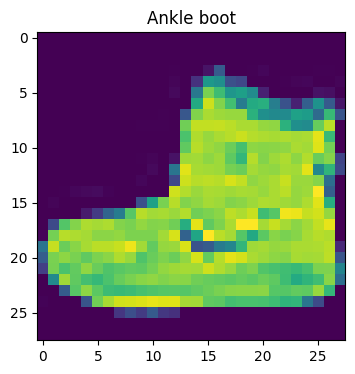

In [9]:
image,label=train_data[0]
plt.figure(figsize=(10,4))
plt.title(class_[label]);
plt.imshow(image.squeeze())

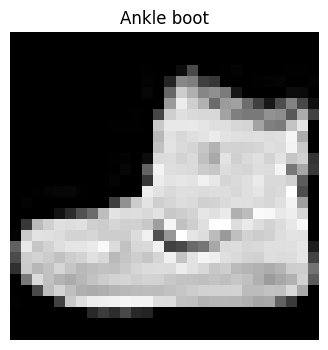

In [10]:
plt.figure(figsize=(10, 4))
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_[label])
plt.axis("off")
plt.show()

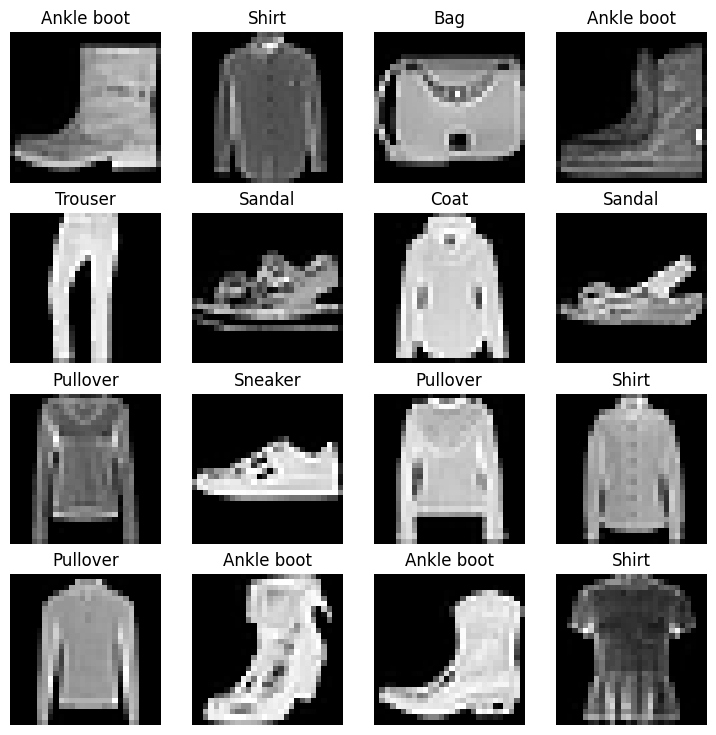

In [11]:
torch.manual_seed(42)
fig=plt.figure(figsize=(9,9))
rows,cols=4,4
for i in range(1,rows*cols+1):
  ran_idx=torch.randint(0,len(train_data),size=[1]).item()
  image,label=train_data[ran_idx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(image.squeeze(),cmap="gray")
  plt.title(class_[label])
  plt.axis("off")

###DataLoader Overview Understanding mini-Batch

In [12]:
#these clothing images could be modelled with pure straight lines or need any non-linear activation function??

###DataLoader converts the dataset into python iterable.. turning dataset into batches...(mini Batches)

why we do this??

#1.It is more computationally effecient as in your computing hardware may not be able to look at all the 60000 images at once.So we break it down to 32 images at a time...

#2.It gives our neural network more chances to update its gradients per epoch.

In [13]:
from torch.utils.data import DataLoader
#setup Hyperperamenter
train_Data_loader=DataLoader(dataset=train_data,
                       batch_size=32,
                       shuffle=True)
test_Data_loader=DataLoader(
    dataset=Test_data,
    batch_size=32,
    shuffle=False
)

In [14]:
print(f"Number of Train DataLoader:{len(train_Data_loader)} of size 32")
print(f"Number of Test DataLoader:{len(test_Data_loader)} of size 32")

Number of Train DataLoader:1875 of size 32
Number of Test DataLoader:313 of size 32


In [15]:
data_feature_sample,data_label_sample=next(iter(train_Data_loader))
data_feature_sample.shape,data_label_sample.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

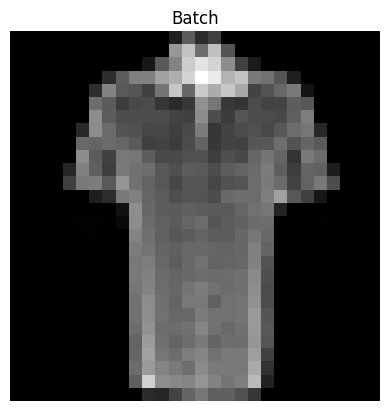

In [16]:
#show a sample Dataloader
torch.manual_seed(42)
random_index=torch.randint(0,len(data_feature_sample),size=[1]).item()
image,label=data_feature_sample[random_index] , data_label_sample[random_index]
plt.imshow(image.squeeze(),cmap="gray")
plt.title("Batch")
plt.axis("off")
plt.show()

#Creating a baseline model with two linear Layers

#We will first pass the train dataloader though flatten modle as we are building a model with two linear layer and linear modle cannot handle multifeature dataset.

In [17]:
#first Computer Vision model:
#starts simply and add complexity when necessary

#First we will create a flatten layer:
flatten_model=nn.Flatten()

#get a sample train data:
x=data_feature_sample[0]

#pass the data through flatten model:(Forward pass)
output=flatten_model(x)

#what we got  after passing the data past the flatten model:
print(f"Shape before flattening:{x.shape}->[color_channel,height,width]")
print(f"Shape after flattening:{output.shape}->[color_channel,height*width]")

Shape before flattening:torch.Size([1, 28, 28])->[color_channel,height,width]
Shape after flattening:torch.Size([1, 784])->[color_channel,height*width]


In [18]:
#model Building:
torch.manual_seed(42)
from torch import nn
class CNNfashion(nn.Module):
  def __init__(self,
               input_shape,
               hidden_layer,
               output_shape):
    super().__init__()
    self.layer_stack=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_layer),
        nn.Linear(in_features=hidden_layer,
                  out_features=output_shape)
        )

  def forward(self,x):
    return self.layer_stack(x)

model=CNNfashion(input_shape=784,
                 hidden_layer=10,
                 output_shape=len(class_))

model



CNNfashion(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

##loss_function and optimizer and Accuracy:

In [19]:
import requests
from pathlib import Path
if Path("helper_function.py").is_file():
  print("Already there")
else:
  print("Downloading")
  request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open("helper_function.py","wb") as f:
    f.write(request.content)

Downloading


In [20]:
#Accuracy:
from helper_function import accuracy_fn
#loss_function:
loss_function=nn.CrossEntropyLoss()
#optimizer:
optimizer=torch.optim.SGD(params=model.parameters(),
                          lr=0.1)

###creating a Function to time our modeling code:

In [21]:
from timeit import default_timer as timer
def print_train_time(start:float,
                     end:float,
                     device:torch.device="None"):
  total_time=end-start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time


# start_time=timer()
# some code:
# end_time=timer()
# print_train_time(start=start_time,
#                  end=end_time,
#                  device="cpu")

#Training and Testing Loop for our Batch Data:

In [22]:
#the optimizer will update a model's paramter once per batch rather than once per epoch.

#Steps:
# 1.Loop through the epochs.
# 2.Loop through the training batch,perform the training steps, calculate the training loss per batch....
# 3.Loop through the testing batch,perform the testing steps, claculate the testing loss per batch...
# 4.Print out whats happening along with timer...

In [23]:
#better progress bar
from tqdm.auto import tqdm

#setting up manual seed
torch.manual_seed(42)

#start timer...
train_start_time=timer()

#number of epochs means 1857 batches of 32 images will run 3 times through our model:
epochs=3

#training and testing loop:
for epoch in tqdm(range(epochs)):
  print(f"epoch: {epoch+1}\n-----")
  train_loss=0
  train_acc=0
  #Add a loop to loop through training the training batches:
  for batch,(X,y) in enumerate(train_Data_loader):
    model.train()
    y_pred=model(X)
    loss=loss_function(y_pred,y)
    train_loss+=loss
    train_acc+=accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  #divide the  train_lodd  by the len of dataloader.
  train_loss/=len(train_Data_loader)
  train_acc/=len(train_Data_loader)

  test_loss=0
  test_acc=0
  model.eval()
  with torch.inference_mode():
    for X,y in test_Data_loader:
      test_pred=model(X)
      test_los=loss_function(test_pred,y)
      test_loss+=test_los
      test_acc+=accuracy_fn(y_true=y,y_pred=test_pred.argmax(dim=1))

    #calculate the test loss (average):
    test_loss/=len(test_Data_loader)
    test_acc/=len(test_Data_loader)

  #print out whats happeing:
  print(f"Training Loss: {loss:.4f} , Training Accuracy:{train_acc:4f} , Testing Loss: {test_loss:.4f} , Testing_Accuracy: {test_acc:.4f}")

train_end_time=timer()
total_time=print_train_time(start=train_start_time,
                            end=train_end_time,
                            device=str(next(model.parameters())))

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 1
-----
Training Loss: 0.4652 , Training Accuracy:79.171667 , Testing Loss: 0.5095 , Testing_Accuracy: 82.0387
epoch: 2
-----
Training Loss: 0.6015 , Training Accuracy:83.320000 , Testing Loss: 0.4799 , Testing_Accuracy: 83.1969
epoch: 3
-----
Training Loss: 0.3182 , Training Accuracy:84.051667 , Testing Loss: 0.4766 , Testing_Accuracy: 83.4265
Train time on Parameter containing:
tensor([[ 0.0273,  0.0298, -0.0065,  ...,  0.0071,  0.0091,  0.0170],
        [-0.0189, -0.0355,  0.0155,  ...,  0.0161,  0.0120,  0.0117],
        [-0.0008,  0.0020,  0.0032,  ...,  0.0058, -0.0146,  0.0084],
        ...,
        [-0.0116,  0.0274, -0.0323,  ...,  0.0527,  0.0434,  0.0006],
        [-0.0231,  0.0252,  0.0236,  ..., -0.0892, -0.0385, -0.0071],
        [ 0.0175, -0.0148,  0.0027,  ..., -0.1155, -0.0674,  0.0125]],
       requires_grad=True): 30.088 seconds


In [24]:
#now we will create evaluation function so that it can run for diffrent model:
def eval(model_=torch.nn.Module,
         data_loader=torch.utils.data.DataLoader,
         loss_fn=torch.nn.Module,
         accuracy_fn=None,
         device: torch.device = torch.device("cpu")):
  model_.eval()
  loss=0
  accu=0
  with torch.inference_mode():
    for X,y in tqdm(data_loader):
      X,y=X.to(device),y.to(device)
      y_pred=model_(X)
      loss+=loss_fn(y_pred,y).item()
      accu+=accuracy_fn(y_true=y,
                y_pred=y_pred.argmax(dim=1))

    loss/=len(data_loader)
    accu/=len(data_loader)

  return {"Model_name":model_.__class__.__name__,
          "Model_loss":loss,
          "Model_accuracy":accu}

model_result=eval(model_=model,
     data_loader=test_Data_loader,
     loss_fn=loss_function,
     accuracy_fn=accuracy_fn)

print(model_result)

  0%|          | 0/313 [00:00<?, ?it/s]

{'Model_name': 'CNNfashion', 'Model_loss': 0.47663889553981087, 'Model_accuracy': 83.42651757188499}


#**ANOTHER MODEL / ANOTHER WAY**

In [25]:
import torch
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

###Creating another model with non-Linear function:

In [26]:
torch.manual_seed(42)
class CNNfashionimp_non_li(nn.Module):
  def __init__(self,
               input_shape,
               output_shape,
               hidden_layer):
    super().__init__()
    self.layer_stackimp=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,out_features=hidden_layer),
        nn.ReLU(),
        nn.Linear(in_features=hidden_layer,out_features=output_shape)
        )

  def forward(self,x:torch.Tensor):
    return self.layer_stackimp(x)

In [27]:
modelimp=CNNfashionimp_non_li(input_shape=784,
                    output_shape=len(class_),
                    hidden_layer=10).to(device)
print(modelimp.state_dict())
next(modelimp.parameters()).device

OrderedDict([('layer_stackimp.1.weight', tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
        [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
        [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
        ...,
        [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
        [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
        [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])), ('layer_stackimp.1.bias', tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
         0.0018,  0.0163])), ('layer_stackimp.3.weight', tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
          0.2019,  0.2847],
        [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.3130, -0.0118,
          0.0932, -0.1864],
        [ 0.2488,  0.1500,  0.1907,  0.1457, -0.3050, -0.0580,  0.1643,  0.1565,
         -0.2877, -0.1792],
        [ 0.2305, -0.2618,  0.239

device(type='cpu')

In [28]:
#Accuracy:
from helper_function import accuracy_fn
#loss_function:
loss_functionimp=nn.CrossEntropyLoss()
#optimizer:
optimizerimp=torch.optim.SGD(params=modelimp.parameters(),
                          lr=0.1)

#Function for training and testsing loop:

In [29]:
def train_step(model_imp:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               device:torch.device,
               accuracy_fn=None):
  model_imp.train()
  train_loss=0
  train_acc=0
  #Add a loop to loop through training the training batches:
  for batch,(X,y) in enumerate(data_loader):
    # Move data to device
    X, y = X.to(device), y.to(device)
    y_pred=model_imp(X)
    loss=loss_fn(y_pred,y)
    train_loss+=loss.item()
    train_acc+=accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  #divide the  train_loader  by the len of dataloader.
  train_loss/=len(data_loader)
  train_acc/=len(data_loader)
  print(f"Train loss:{train_loss:.4f}, Train Accuracy:{train_acc:.4f}")

In [30]:
def test_step(model_imp:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               device:torch.device,
               accuracy_fn=None):
  test_loss=0
  test_acc=0
  model_imp.eval()
  with torch.inference_mode():
    for X,y in data_loader:
      # Move data to device
      X, y = X.to(device), y.to(device)
      test_pred=model_imp(X)
      test_los=loss_fn(test_pred,y)
      test_loss+=test_los.item()
      test_acc+=accuracy_fn(y_true=y,y_pred=test_pred.argmax(dim=1))

    #calculate the test loss (average):
    test_loss/=len(data_loader)
    test_acc/=len(data_loader)
    print(f"Test Loss:{test_loss:.4f} ,Test Accuracy:{test_acc:.4f}")

In [31]:
#setting up manual seed
torch.manual_seed(42)

#start timer...
train_start_time_imp=timer()

#number of epochs means 1857 batches of 32 images will run 3 times through our model:
epochs=3
for epoch in tqdm(range(epochs)):
  print(f"Epoch:{epoch}/n-----")
  train_step(model_imp=modelimp,
             data_loader=train_Data_loader,
             loss_fn=loss_functionimp,
             optimizer=optimizerimp,
             device=device,
             accuracy_fn=accuracy_fn)
  test_step(model_imp=modelimp,
            data_loader=test_Data_loader,
            loss_fn=loss_functionimp,
            optimizer=optimizerimp,
            device=device,
            accuracy_fn=accuracy_fn)

train_end_time_imp=timer()
total_time__non_li=print_train_time(start=train_start_time_imp,
                            end=train_end_time_imp,
                            device=device)
modelimp

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:0/n-----
Train loss:0.6461, Train Accuracy:77.1700
Test Loss:0.5386 ,Test Accuracy:80.7608
Epoch:1/n-----
Train loss:0.4809, Train Accuracy:82.9433
Test Loss:0.4939 ,Test Accuracy:82.4581
Epoch:2/n-----
Train loss:0.4469, Train Accuracy:84.1633
Test Loss:0.4575 ,Test Accuracy:83.9856
Train time on cpu: 30.050 seconds


CNNfashionimp_non_li(
  (layer_stackimp): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
  )
)

 Note:
Sometimes, depending on your data/hardware, you might find that your model trains faster on CPU than GPU.

❓ Why is this?
Overhead Costs:
Copying data between the CPU and GPU can take time. If your model or dataset is small, the communication overhead might be more than the speedup from using a GPU.

Hardware Differences:
The CPU you're using might actually have better performance (e.g., more powerful cores or higher clock speed) relative to the GPU available on your system.

In [32]:
model_result_non_li= eval(model_=modelimp,
                    device=device,
                    data_loader=test_Data_loader,
                    loss_fn=loss_functionimp,
                    accuracy_fn=accuracy_fn
)

  0%|          | 0/313 [00:00<?, ?it/s]

In [33]:
print(model_result_non_li)

{'Model_name': 'CNNfashionimp_non_li', 'Model_loss': 0.4574634914104931, 'Model_accuracy': 83.98562300319489}


In [34]:
print(model_result)

{'Model_name': 'CNNfashion', 'Model_loss': 0.47663889553981087, 'Model_accuracy': 83.42651757188499}


#CONVOLUTIONAL NEURAL NETWORK HIGH LEVEL OVERVIEW

###CONVOLUTIONAL NEURAL NETWORK IS ALSO CALLED COVNETS---
###BEST IN FINDING PATTRENS WITHIN IMAGE---

In [35]:
from torch import nn
class CNNFirst(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_layer:int,
               output_shape:int):
    super().__init__()
    self.Conv_block_1=nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_layer,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_layer,
                  out_channels=hidden_layer,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.Conv_block_2=nn.Sequential(
        nn.Conv2d(in_channels=hidden_layer,
                  out_channels=hidden_layer,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_layer,
                  out_channels=hidden_layer,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classfier=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_layer*7*7,
                  out_features=len(class_))
    )


  def forward(self,x):
    x=self.Conv_block_1(x)
    #print(x.shape)                 #compulsory to write to find out the shape for next layer
    x=self.Conv_block_2(x)
    #print(x.shape)                #compulsory to write to find out the shape for next layer
    x=self.classfier(x)
    #print(x.shape)
    return x


In [36]:
model_CNN=CNNFirst(input_shape=1,# number of colour channels since we have black and white image dataset we will have one colour channels but if we have colurfull images we will have 3 colour channels.
                   hidden_layer=30,
                   output_shape=1).to(device)
model_CNN

CNNFirst(
  (Conv_block_1): Sequential(
    (0): Conv2d(1, 30, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(30, 30, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (Conv_block_2): Sequential(
    (0): Conv2d(30, 30, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(30, 30, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classfier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1470, out_features=10, bias=True)
  )
)

In [37]:
###steping in conv2d layer:
image_data=torch.randn(32,3,64,64)
image_test=image_data[0]

print(f"shape of image_data: {image_data.shape}")
print(f"Shape of image_test: {image_test.shape}")
print(f"Image_test: {image_test}")

shape of image_data: torch.Size([32, 3, 64, 64])
Shape of image_test: torch.Size([3, 64, 64])
Image_test: tensor([[[ 0.3811,  0.1663,  0.1838,  ..., -0.0042,  0.3015, -0.6351],
         [-0.3368,  2.2371, -1.4603,  ..., -0.6701, -0.7264, -1.1232],
         [-0.5912, -1.8621,  0.5204,  ..., -0.6680,  0.1039,  1.5709],
         ...,
         [ 0.1588, -0.6031, -0.3986,  ...,  0.7355,  0.0237,  0.9791],
         [-0.9533, -0.1899,  0.2951,  ..., -0.5164,  0.5199,  0.5501],
         [-0.3130,  0.2207,  0.5152,  ...,  1.4178,  0.5995, -0.1610]],

        [[ 0.9542, -0.5875, -0.9802,  ..., -0.4601,  0.6375,  0.4837],
         [ 0.5316,  0.1006,  0.1551,  ..., -1.4548, -0.2098,  0.2467],
         [ 0.0659, -0.4125,  0.0889,  ..., -1.4390,  0.6416,  0.0872],
         ...,
         [ 0.7025, -1.2984, -0.3760,  ...,  0.3111, -0.2677,  0.6393],
         [-0.7976,  1.2675, -0.2634,  ..., -0.7679,  1.0679, -0.2806],
         [ 0.2984, -1.5368, -0.5082,  ...,  0.0553,  0.3668,  0.1438]],

        [[

In [38]:
conv_layer=nn.Conv2d(in_channels=3,
                     out_channels=10,
                     kernel_size=3,
                     stride=1,
                     padding=1)
conv_output=conv_layer(image_test)
conv_output

tensor([[[ 2.3743e-04,  1.8787e-01, -3.5328e-01,  ...,  1.8803e-01,
           5.7530e-02,  3.6102e-01],
         [-5.9391e-01, -1.1605e-01,  6.3468e-01,  ...,  2.1314e-01,
           6.0899e-01, -9.0482e-02],
         [ 4.5736e-02,  9.4228e-02, -2.6817e-01,  ..., -5.6895e-01,
          -5.4969e-01, -3.1758e-02],
         ...,
         [ 7.3267e-01,  1.2180e+00, -1.5166e-01,  ..., -1.0785e+00,
           1.5516e-01, -7.2985e-01],
         [ 8.4429e-01, -1.6448e-01,  3.0035e-01,  ...,  1.4027e+00,
          -7.9413e-01,  1.5844e-01],
         [-1.1002e-01,  4.2802e-01,  4.9562e-01,  ..., -5.8083e-01,
          -1.9262e-01, -8.3637e-02]],

        [[-8.5856e-01,  2.3425e-01,  1.1088e-01,  ..., -5.1568e-01,
          -1.9072e-02, -5.1570e-01],
         [-3.7429e-01, -1.1473e-01, -6.5089e-01,  ...,  1.0055e-01,
          -1.0874e-01,  1.4183e-01],
         [ 4.2126e-02, -1.2811e-01, -6.7372e-01,  ...,  2.1964e-01,
          -5.3657e-01, -4.5872e-01],
         ...,
         [-1.9427e-01, -9

In [39]:
print(f"shape of image_data: {image_data.shape}")
print(f"shape of conv_layer: {conv_output.shape}")

shape of image_data: torch.Size([32, 3, 64, 64])
shape of conv_layer: torch.Size([10, 64, 64])


#FIGURING OUT THE INPUT AND OUTPUT SHAPE OF DIFFERNT LAYERS

In [40]:
rand_image=torch.randn(size=(1,28,28)).to(device).unsqueeze(0)
model_CNN(rand_image)

tensor([[ 0.0412,  0.0228, -0.0008, -0.0158, -0.0057, -0.0162, -0.0015, -0.0290,
          0.0112,  0.0493]], grad_fn=<AddmmBackward0>)

#Training and testing(loss function and Optimizer of our CNN model):

In [41]:
from helper_function import accuracy_fn
loss_function_cnn=nn.CrossEntropyLoss()
optimizer_cnn=torch.optim.SGD(params=model_CNN.parameters(),
                              lr=0.1)

In [42]:
torch.manual_seed(42)
from timeit import default_timer as timer
start_time_cnn=timer()
epochs=5
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n---------")
  train_step(model_imp=model_CNN,
             data_loader=train_Data_loader,
             loss_fn=loss_function_cnn,
             optimizer=optimizer_cnn,
             device=device,
             accuracy_fn=accuracy_fn)
  test_step(model_imp=model_CNN,
            data_loader=test_Data_loader,
            loss_fn=loss_function_cnn,
            optimizer=optimizer_cnn,
            device=device,
            accuracy_fn=accuracy_fn)

end_time_cnn=timer()
train_model_cnn=print_train_time(start=start_time_cnn,
                 end=end_time_cnn,
                 device=device)
model_CNN

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss:0.5628, Train Accuracy:79.6867
Test Loss:0.3538 ,Test Accuracy:87.2204
Epoch: 1
---------
Train loss:0.3161, Train Accuracy:88.6567
Test Loss:0.3074 ,Test Accuracy:89.1573
Epoch: 2
---------
Train loss:0.2708, Train Accuracy:90.2917
Test Loss:0.2774 ,Test Accuracy:90.0060
Epoch: 3
---------
Train loss:0.2457, Train Accuracy:91.1433
Test Loss:0.2634 ,Test Accuracy:90.3654
Epoch: 4
---------
Train loss:0.2271, Train Accuracy:91.9200
Test Loss:0.2586 ,Test Accuracy:90.9345
Train time on cpu: 607.481 seconds


CNNFirst(
  (Conv_block_1): Sequential(
    (0): Conv2d(1, 30, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(30, 30, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (Conv_block_2): Sequential(
    (0): Conv2d(30, 30, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(30, 30, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classfier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1470, out_features=10, bias=True)
  )
)

In [43]:
model_CNN_output=eval(model_=model_CNN,
                      data_loader=test_Data_loader,
                      loss_fn=loss_function_cnn,
                      accuracy_fn=accuracy_fn,
                      device=device)
model_CNN_output

  0%|          | 0/313 [00:00<?, ?it/s]

{'Model_name': 'CNNFirst',
 'Model_loss': 0.2585536369952721,
 'Model_accuracy': 90.93450479233226}

In [44]:
import pandas as pd
com=pd.DataFrame([model_result,model_result_non_li,model_CNN_output])
com

,Model_name,Model_loss,Model_accuracy
0,CNNfashion,0.476639,83.426518
1,CNNfashionimp_non_li,0.457463,83.985623
2,CNNFirst,0.258554,90.934505


In [45]:
com['train_time']=[total_time,
                   total_time__non_li,
                   train_model_cnn]
com

,Model_name,Model_loss,Model_accuracy,train_time
0,CNNfashion,0.476639,83.426518,30.088161
1,CNNfashionimp_non_li,0.457463,83.985623,30.049847
2,CNNFirst,0.258554,90.934505,607.481053


Text(0, 0.5, 'Models')

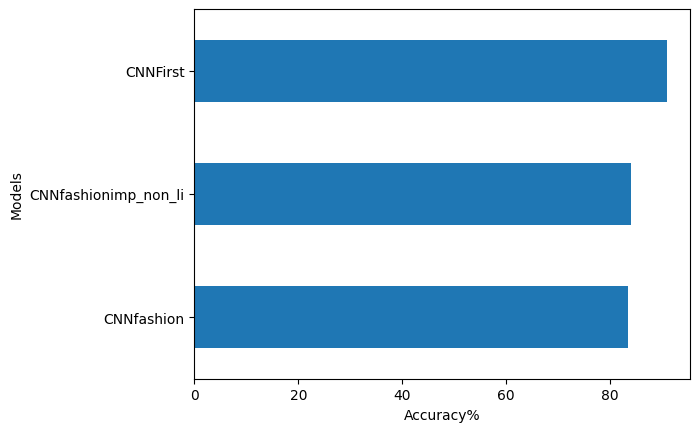

In [46]:
com.set_index("Model_name")["Model_accuracy"].plot(kind="barh")
plt.xlabel("Accuracy%")
plt.ylabel("Models")


#Making prediction on random test_data on our best model:

In [47]:
def make_prediction(model:torch.nn.Module,
               data:list,
               device:torch.device=device):
  pred_probs=[]
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
    #making our sample to pass through the model:
      sample=torch.unsqueeze(sample,dim=0).to(device)
    #now getting raw logits by passing the data from our model:
      y_pred=model(sample)
    #now logits to prediction probabilities:
      pred_prob=torch.softmax(y_pred.squeeze(),dim=0)
    #now tranferring the pred pobs from gpu to cpu for futher evaluation:
      pred_probs.append(pred_prob.cpu())

    #stack the pred_probs from list to tensor
    return torch.stack(pred_probs)

In [48]:
import random
random.seed(13)
test_samples=[]
test_labels=[]
for sample,label in random.sample(list(Test_data),k=9):
  test_samples.append(sample)
  test_labels.append(label)

print(test_samples[0])

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

Text(0.5, 1.0, 'Bag')

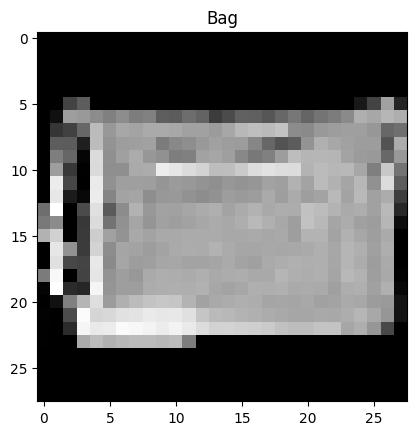

In [49]:
plt.imshow(test_samples[0].squeeze(),cmap="gray")
plt.title(class_[test_labels[0]])

In [50]:
#Make prediction:
pred_probs=make_prediction(model=model_CNN,
                       data=test_samples
                      )
pred_probs[:2]

tensor([[3.4622e-05, 3.6988e-08, 3.3475e-06, 8.6983e-08, 2.0540e-07, 1.1185e-06,
         5.0145e-06, 5.4132e-07, 9.9994e-01, 1.3128e-05],
        [3.1582e-01, 1.9970e-04, 4.9804e-04, 1.4509e-01, 8.6349e-04, 4.8714e-04,
         1.2509e-01, 1.7158e-04, 4.1177e-01, 1.0231e-05]])

In [51]:
test_labels

[8, 6, 5, 4, 7, 1, 5, 1, 4]

In [52]:
#convert prediction probabilities to label:
pred_lables=pred_probs.argmax(dim=1)
pred_lables

tensor([8, 8, 5, 4, 7, 1, 5, 1, 3])

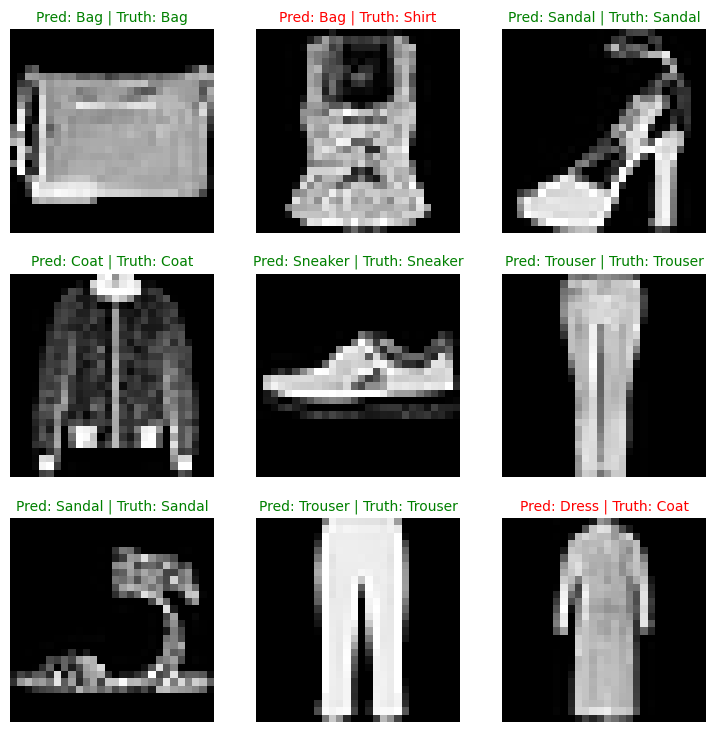

In [53]:
#visualize visualize visualize
plt.figure(figsize=(9,9))
nrows=3
ncols=3
for i,sample in enumerate(test_samples):
  #plot the subplot
  plt.subplot(nrows,ncols,i+1)
  #make the target image
  plt.imshow(sample.squeeze(),cmap="gray")
  #Predicted_labels:
  pred_label=class_[pred_lables[i]]
  #truth label:
  true_label=class_[test_labels[i]]

  #create the title of each subplot:
  title_text=f"Pred: {pred_label} | Truth: {true_label}"

  #check the eqality and changing color of right or wrong prdiction:
  if pred_label==true_label:
    plt.title(title_text,fontsize=10,c='g')
    plt.axis("off")
  else:
    plt.title(title_text,fontsize=10,c="r")
    plt.axis("off")

#CONFUSION MATRIX:
#means it is basiaclly used to calculate how many times our model did false prediction each class(label)

In [54]:
#step 1: Making prediction through our model:
pred=[]
model_CNN.eval()
with torch.inference_mode():
  for X,y in tqdm(test_Data_loader,desc="Making predictions..."):
    X,y=X.to(device),y.to(device)
    y_pred=model_CNN(X)
    pred_probs=torch.softmax(y_pred.squeeze(),dim=0).argmax(dim=1)
    pred.append(pred_probs.cpu())

y_pred_tensor=torch.cat(pred)
y_pred_tensor

Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1,  ..., 8, 1, 0])

In [55]:
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime #only important
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.23.4


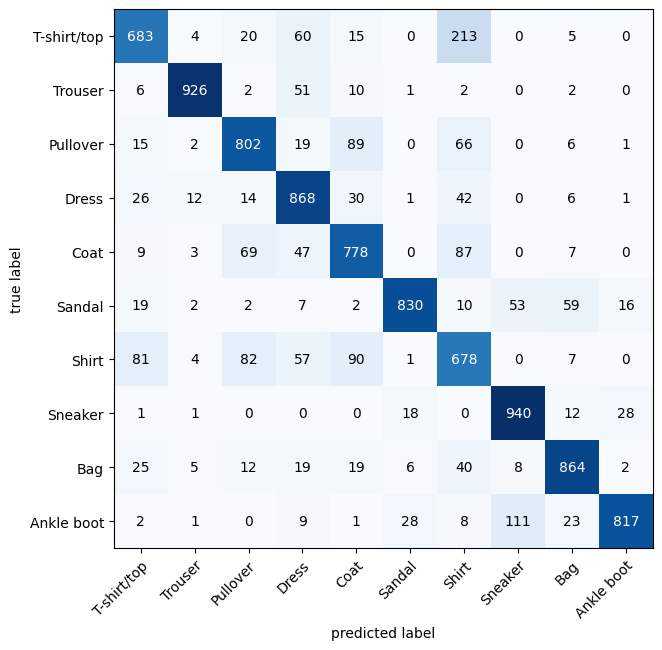

In [57]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix
#step 2:Setup confusion matrix instance and compare predictions to targets:
confusion_matrix=ConfusionMatrix(num_classes=len(class_),task="multiclass")
confusion_matrix_tensor=confusion_matrix(preds=y_pred_tensor,
                                         target=Test_data.targets)
#step 3:Plot the the confusion matrix:
fig,ax=plot_confusion_matrix(conf_mat=confusion_matrix_tensor.numpy(),
                             class_names=class_,
                             figsize=(10,7)
                             );

#SAVING AND LOADING OUR BEST PERFORMING MODEL:

In [60]:
from pathlib import Path
#creating the path and folder
Model_path=Path("Model_CNN")
Model_path.mkdir(parents=True,
                 exist_ok=True)

#Model naming and its path naming:
Model_name="CNN_model_CONV2D.pth"
Model_saving_path=Model_path / Model_name

#saving the model:
print(f"Saving model to: {Model_saving_path}")
torch.save(obj=model_CNN.state_dict(), # only saving the state_dict() only saves the learned parameters
           f=Model_saving_path)

Saving model to: Model_CNN/CNN_model_CONV2D.pth


In [62]:
#using our saved model again:
loaded_model=CNNFirst(input_shape=1,
                      hidden_layer=30,
                      output_shape=1)
loaded_model.load_state_dict(torch.load(f=Model_saving_path))
loaded_model=loaded_model.to(device)
#evaluate our model:
torch.manual_seed(42)
loaded_model_result=eval(model_=loaded_model,
                         data_loader=test_Data_loader,
                         loss_fn=loss_function_cnn,
                         accuracy_fn=accuracy_fn,
                         device=device)
loaded_model_result

  0%|          | 0/313 [00:00<?, ?it/s]

{'Model_name': 'CNNFirst',
 'Model_loss': 0.2585536369952721,
 'Model_accuracy': 90.93450479233226}

In [63]:
model_CNN_output

{'Model_name': 'CNNFirst',
 'Model_loss': 0.2585536369952721,
 'Model_accuracy': 90.93450479233226}